In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

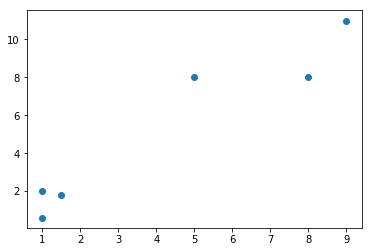

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
class KMeans:
    def __init__(self, k = 5 , max_iter = 1000):
        self.k = k
        self.max_iter = 1000
    
    def fit(self, data):
        self.mean_points = []
        for i in range(self.k):
            self.mean_points.append(data[i])
        
        for iter in range(self.max_iter):
            cluster_points = []
            distances = []
            for i in range(self.k):
                cluster_points.append([])
            for point in data:
                distances = [((point - mean)**2).sum() for mean in self.mean_points]
                min_dist = min(distances)
                classification = distances.index(min_dist)
                cluster_points[classification].append(point)
            change = False
            for i in range(self.k):
                new_mean  = np.average(cluster_points[i], axis = 0)
                if not np.array_equal(self.mean_points[i], new_mean):
                    change = True
                self.mean_points[i] = new_mean
            if not change:
                break
        self.labels = self.predict(data)
        
    def predict(self, test_data):
        cluster_prediction = []
        for point in test_data:
                distances = [((point - mean)**2).sum() for mean in self.mean_points]
                min_dist = min(distances)
                classification = distances.index(min_dist)
                cluster_prediction.append(classification)
        return cluster_prediction

In [5]:
c = KMeans(k = 2)
c.k

2

In [6]:
c.fit(X)

In [7]:
c.labels

[0, 0, 1, 1, 0, 1]

In [8]:
c.predict(X)

[0, 0, 1, 1, 0, 1]

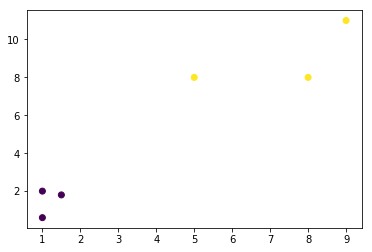

In [9]:
plt.scatter(X[:,0],X[:,1], c = c.predict(X))
plt.show()